In [448]:
# импортирn библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
# импортирт библиотеки для транслитерации
import transliterate

from datetime import datetime, date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 12000)
pd.set_option('display.width', 160)


Запись из CSV-файла в объект DataFrame и его представление

In [449]:
df = pd.read_csv('MFOcredit.csv', encoding='cp1251', sep=';', decimal = ",")
#print(df.shape)
df.head(50)

,id,date_start,date_end,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus
0,1,03-Jan-2013,12-Jan-2013,Мужской,44,Нет,Собственное,Гражданский брак/женат/замужем,Нет,Официальное,Новосибирская область,Нет,Да,Нет
1,2,03-Jan-2013,17-Jan-2013,Мужской,21,Пропуск поля,Живут с родителями,Холост,Нет,Официальное,Кемеровская область юг,Да,Нет,Нет
2,3,03-Jan-2013,17-Jan-2013,Мужской,25,Пропуск поля,Собственное,Холост,Да,Официальное,Кемеровская область север,Пропуск поля,Нет,Нет
3,4,03-Jan-2013,17-Jan-2013,Женский,47,Пропуск поля,Собственное,Гражданский брак/женат/замужем,Да,Официальное,Кемеровская область север,Нет,Нет,Нет
4,5,03-Jan-2013,17-Jan-2013,Мужской,22,Нет,Арендуемое,Гражданский брак/женат/замужем,Нет,Официальное,Кемеровская область север,Да,Да,Нет
5,6,03-Jan-2013,17-Jan-2013,Мужской,40,Нет,Собственное,Разведен,Нет,Неофициальное,Кемеровская область север,Нет,Нет,Нет
6,7,03-Jan-2013,17-Jan-2013,Женский,63,Пропуск поля,Собственное,Пропуск поля,Да,Пропуск поля,Кемеровская область север,Да,Пропуск поля,Нет
7,8,03-Jan-2013,17-Jan-2013,Женский,29,Нет,Собственное,Разведен,Да,Пропуск поля,Кемеровская область север,Нет,Да,Нет
8,9,03-Jan-2013,17-Jan-2013,Женский,27,Пропуск поля,Пропуск поля,Пропуск поля,Да,Пропуск поля,Кемеровская область юг,Да,Нет,Нет
9,10,03-Jan-2013,17-Jan-2013,Мужской,20,Пропуск поля,Муниципальное,Холост,Нет,Пропуск поля,Кемеровская область юг,Нет,Нет,Нет


In [450]:
#размерность датафрейма
df.shape

(35212, 14)

In [451]:
# индекс столбцов
df.columns


Index(['id', 'date_start', 'date_end', 'gender', 'age', 'auto', 'housing', 'marstatus', 'regclient', 'jobtype', 'region', 'credits', 'children',
       'delinq60plus'],
      dtype='object')

In [452]:
# удаение солбца id, cоздание рабочей копии: credit_df
credit_df = df.drop(df.columns[0], axis='columns').copy()

In [453]:
# cписок столбцов
credit_df.columns.tolist()

['date_start',
 'date_end',
 'gender',
 'age',
 'auto',
 'housing',
 'marstatus',
 'regclient',
 'jobtype',
 'region',
 'credits',
 'children',
 'delinq60plus']

In [454]:
# информация по преременным:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35212 entries, 0 to 35211
Data columns (total 13 columns):
date_start      35212 non-null object
date_end        35212 non-null object
gender          35212 non-null object
age             35212 non-null int64
auto            35212 non-null object
housing         35212 non-null object
marstatus       35212 non-null object
regclient       35212 non-null object
jobtype         35212 non-null object
region          35212 non-null object
credits         35212 non-null object
children        35212 non-null object
delinq60plus    35212 non-null object
dtypes: int64(1), object(12)
memory usage: 3.5+ MB


In [455]:
# частоты категорий по каждой
for c in [c for c in credit_df.columns]:
    print(credit_df[c].value_counts())


30-Dec-2013    425
31-Dec-2013    299
27-Dec-2013    275
28-Dec-2013    256
23-Dec-2013    242
26-Dec-2013    240
25-Dec-2013    229
29-Dec-2013    226
09-Dec-2013    223
05-Dec-2013    206
02-Dec-2013    203
06-Dec-2013    202
20-Dec-2013    201
05-Nov-2013    200
03-Dec-2013    199
18-Dec-2013    199
10-Dec-2013    194
24-Dec-2013    194
11-Dec-2013    188
13-Dec-2013    188
17-Dec-2013    186
03-Jan-2014    180
04-Dec-2013    176
19-Dec-2013    175
07-Dec-2013    174
29-Nov-2013    172
12-Dec-2013    172
26-Nov-2013    171
14-Dec-2013    163
30-Sep-2013    162
27-Nov-2013    160
16-Dec-2013    158
18-Nov-2013    155
21-Nov-2013    154
22-Nov-2013    153
28-Oct-2013    152
07-Nov-2013    151
04-Oct-2013    151
29-Oct-2013    150
01-Nov-2013    150
28-Nov-2013    149
25-Nov-2013    149
08-Nov-2013    148
11-Nov-2013    146
28-Aug-2013    144
06-Nov-2013    144
20-Nov-2013    138
30-Nov-2013    137
09-Oct-2013    137
21-Oct-2013    137
30-Aug-2013    136
31-Oct-2013    134
23-Sep-2013 

In [456]:
credit_df.isnull().sum()

date_start      0
date_end        0
gender          0
age             0
auto            0
housing         0
marstatus       0
regclient       0
jobtype         0
region          0
credits         0
children        0
delinq60plus    0
dtype: int64

In [457]:
date_start = credit_df['date_start'].value_counts()
date_start.head(10)

30-Dec-2013    425
31-Dec-2013    299
27-Dec-2013    275
28-Dec-2013    256
23-Dec-2013    242
26-Dec-2013    240
25-Dec-2013    229
29-Dec-2013    226
09-Dec-2013    223
05-Dec-2013    206
Name: date_start, dtype: int64

In [458]:
date_start = credit_df['date_end'].value_counts()
date_start.head(10)

13-Jan-2014    403
14-Jan-2014    289
10-Jan-2014    267
11-Jan-2014    251
09-Jan-2014    250
08-Jan-2014    239
06-Jan-2014    238
12-Jan-2014    236
20-Dec-2013    205
23-Dec-2013    204
Name: date_end, dtype: int64

In [459]:
for i in ['gender', 'auto', 'housing','regclient',\
          'marstatus','jobtype','region', 'credits', 'children', 'delinq60plus']:
    credit_df[i] = credit_df[i].apply(lambda x: \
                                      transliterate.translit(x, reversed=True))

In [460]:
label_encoder = LabelEncoder()
credit_df['delinq60plus_LE'] = label_encoder.fit_transform(credit_df['delinq60plus'])

In [461]:
# перевод формата даты
credit_df['date_start'] = pd.to_datetime(credit_df['date_start'])
credit_df['date_end'] = pd.to_datetime(credit_df['date_end'])
# продолжительность займа
credit_df['period'] = credit_df['date_end'] - credit_df['date_start']
credit_df['period_days'] = credit_df['period'].dt.days

# номер недели в году, когда выдан займ
credit_df['week'] = pd.to_datetime(credit_df['date_start']).dt.week

In [462]:

credit_df.head()

,date_start,date_end,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus,delinq60plus_LE,period,period_days,week
0,2013-01-03,2013-01-12,Muzhskoj,44,Net,Sobstvennoe,Grazhdanskij brak/zhenat/zamuzhem,Net,Ofitsial'noe,Novosibirskaja oblast',Net,Da,Net,1,9 days,9,1
1,2013-01-03,2013-01-17,Muzhskoj,21,Propusk polja,Zhivut s roditeljami,Holost,Net,Ofitsial'noe,Kemerovskaja oblast' jug,Da,Net,Net,1,14 days,14,1
2,2013-01-03,2013-01-17,Muzhskoj,25,Propusk polja,Sobstvennoe,Holost,Da,Ofitsial'noe,Kemerovskaja oblast' sever,Propusk polja,Net,Net,1,14 days,14,1
3,2013-01-03,2013-01-17,Zhenskij,47,Propusk polja,Sobstvennoe,Grazhdanskij brak/zhenat/zamuzhem,Da,Ofitsial'noe,Kemerovskaja oblast' sever,Net,Net,Net,1,14 days,14,1
4,2013-01-03,2013-01-17,Muzhskoj,22,Net,Arenduemoe,Grazhdanskij brak/zhenat/zamuzhem,Net,Ofitsial'noe,Kemerovskaja oblast' sever,Da,Da,Net,1,14 days,14,1


In [463]:
credit_df['period_days']

0         9
1        14
2        14
3        14
4        14
         ..
35207    14
35208    14
35209    14
35210    14
35211    14
Name: period_days, Length: 35212, dtype: int64

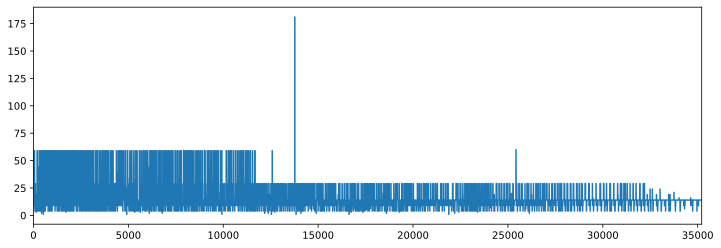

In [464]:
#срок займа
credit_df['period_days'].plot(figsize=(12,4))

In [465]:
#частота встречаемости сроков займа
credit_df['period_days'].value_counts()


14     28335
9       3414
29      1187
4       1032
59       593
19       286
6         52
7         29
13        28
24        24
15        19
20        18
11        16
5         15
10        15
12        13
21        13
3         12
2         11
16        10
8         10
34         9
17         8
23         7
1          7
39         6
44         5
31         4
30         4
18         4
22         4
25         4
26         4
49         2
28         2
33         2
41         1
42         1
38         1
181        1
35         1
27         1
60         1
32         1
Name: period_days, dtype: int64

In [466]:
period_df = pd.DataFrame({'period': credit_df['period_days'], 'delinq': credit_df['delinq60plus_LE']})
period_df.head()

,period,delinq
0,9,1
1,14,1
2,14,1
3,14,1
4,14,1


In [467]:
# Выборка периодов без просрочки
period_df_no = period_df.loc[period_df['delinq'] == 1]
period_df_no

,period,delinq
0,9,1
1,14,1
2,14,1
3,14,1
4,14,1
...,...,...
35207,14,1
35208,14,1
35209,14,1
35210,14,1


In [468]:
# с просрочкой:
period_df_y = period_df.loc[period_df['delinq'] != 1]
period_df_y

,period,delinq
13,14,0
14,14,0
15,14,0
16,14,0
17,59,0
...,...,...
33823,14,0
34305,14,0
34730,14,0
35028,14,0


In [469]:
# частота встречаемости периодов без просрочки
period_df_no['period'].value_counts().head(10)

14    17510
9      2269
4       817
29      634
19      154
59      109
6        27
7        18
13       17
24       14
Name: period, dtype: int64

In [470]:
# частота встречаемости периодов с просрочкой
period_df_y['period'].value_counts().head(10)

14    10825
9      1145
29      553
59      484
4       215
19      132
6        25
15       11
7        11
13       11
Name: period, dtype: int64

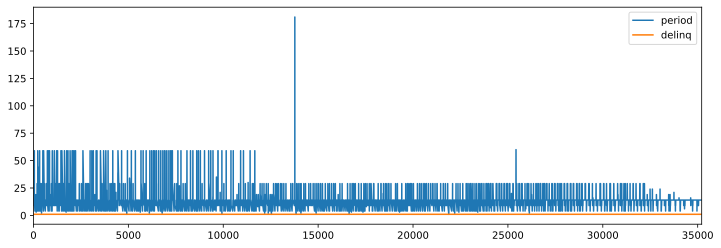

In [471]:
#без просрочки
period_df_no.plot(figsize=(12,4))

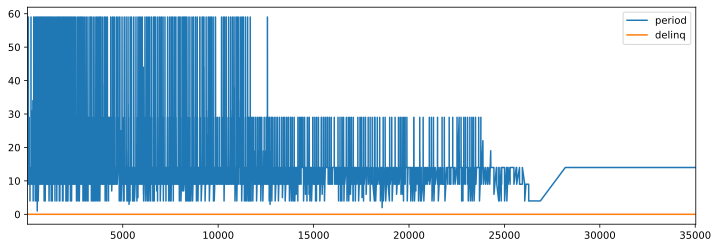

In [472]:
#c просрочкой
period_df_y.plot(figsize=(12,4))

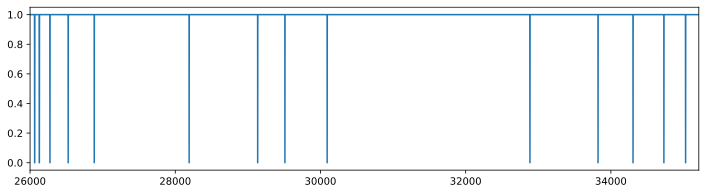

In [473]:
period_df['delinq'][26000:].plot(figsize=(12,3))

In [474]:
credit_df[['date_start', 'date_end', 'region', 'period_days', 'delinq60plus']].tail(9000)

,date_start,date_end,region,period_days,delinq60plus
26212,2013-11-11,2013-11-25,Kemerovskaja oblast' jug,14,Net
26213,2013-11-11,2013-11-25,Kemerovskaja oblast' sever,14,Net
26214,2013-11-11,2013-12-10,Kemerovskaja oblast' sever,29,Net
26215,2013-11-11,2013-12-10,Kemerovskaja oblast' sever,29,Net
26216,2013-11-11,2013-12-10,Kemerovskaja oblast' sever,29,Net
26217,2013-11-11,2013-12-10,Altajskij kraj,29,Net
26218,2013-11-11,2013-12-10,Kemerovskaja oblast' sever,29,Net
26219,2013-11-11,2013-11-25,Kemerovskaja oblast' jug,14,Net
26220,2013-11-11,2013-11-25,Kemerovskaja oblast' sever,14,Net
26221,2013-11-11,2013-11-25,Kemerovskaja oblast' sever,14,Net


In [475]:
# Количество значений целевой переменной после 26212 по 36212(окончание)
credit_df.delinq60plus.tail(9000).value_counts()

Net    8985
Da       15
Name: delinq60plus, dtype: int64

In [476]:
# Вывод максимальных количеств займов в день по датам, по убыванию
date_start_VC = credit_df['date_start'].value_counts()
dsi = date_start_VC.index.copy()
date_start_VC 

2013-12-30    425
2013-12-31    299
2013-12-27    275
2013-12-28    256
2013-12-23    242
2013-12-26    240
2013-12-25    229
2013-12-29    226
2013-12-09    223
2013-12-05    206
2013-12-02    203
2013-12-06    202
2013-12-20    201
2013-11-05    200
2013-12-18    199
2013-12-03    199
2013-12-10    194
2013-12-24    194
2013-12-13    188
2013-12-11    188
2013-12-17    186
2014-01-03    180
2013-12-04    176
2013-12-19    175
2013-12-07    174
2013-12-12    172
2013-11-29    172
2013-11-26    171
2013-12-14    163
2013-09-30    162
2013-11-27    160
2013-12-16    158
2013-11-18    155
2013-11-21    154
2013-11-22    153
2013-10-28    152
2013-11-07    151
2013-10-04    151
2013-10-29    150
2013-11-01    150
2013-11-28    149
2013-11-25    149
2013-11-08    148
2013-11-11    146
2013-08-28    144
2013-11-06    144
2013-11-20    138
2013-10-09    137
2013-10-21    137
2013-11-30    137
2013-08-30    136
2013-10-31    134
2013-09-23    134
2013-09-09    133
2013-11-15    132
2013-06-14

In [477]:
temp = {'ind': dsi,'val': date_start_VC.values}
date_start_VC_df = pd.DataFrame(temp)
date_start_VC_df['ind'] = pd.to_datetime(date_start_VC_df['ind'])
dti_sort = date_start_VC_df.sort_values(by='ind')


In [478]:
dti_sort.to_csv('dti_sort.csv', index = False)
df_sort = pd.read_csv('dti_sort.csv', index_col='ind')
df_sort

,val
ind,
2013-01-03,32
2013-01-04,44
2013-01-05,33
2013-01-06,31
2013-01-07,32
2013-01-08,31
2013-01-09,49
2013-01-10,55
2013-01-11,58


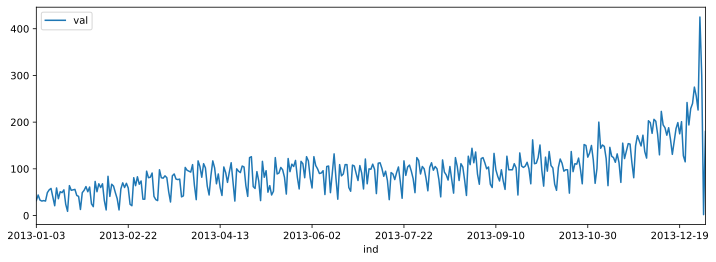

In [479]:
# за год
df_sort.plot(figsize=(12,4))

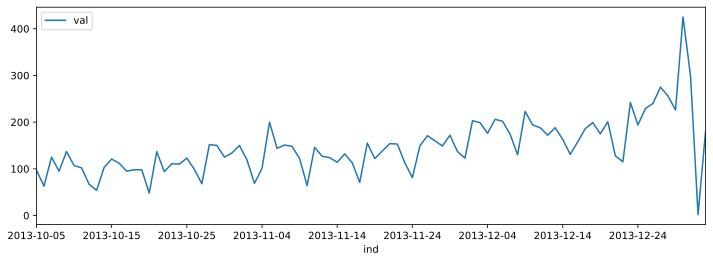

In [480]:
# последние 3 месяца в году
df_sort.tail(90).plot(figsize=(12,4))

In [481]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35212 entries, 0 to 35211
Data columns (total 17 columns):
date_start         35212 non-null datetime64[ns]
date_end           35212 non-null datetime64[ns]
gender             35212 non-null object
age                35212 non-null int64
auto               35212 non-null object
housing            35212 non-null object
marstatus          35212 non-null object
regclient          35212 non-null object
jobtype            35212 non-null object
region             35212 non-null object
credits            35212 non-null object
children           35212 non-null object
delinq60plus       35212 non-null object
delinq60plus_LE    35212 non-null int32
period             35212 non-null timedelta64[ns]
period_days        35212 non-null int64
week               35212 non-null int64
dtypes: datetime64[ns](2), int32(1), int64(3), object(10), timedelta64[ns](1)
memory usage: 4.4+ MB


In [482]:
# обобщение редких возрастов  'age'
credit_df.loc[credit_df['age'].value_counts()[credit_df['age']].values < 69 , 
         'age'] = '69'

In [483]:
# обобщение редких периодов займа     credit_df['period_days']
credit_df.loc[credit_df['period_days'].value_counts()[credit_df['period_days']].values < 20 , 
         'period_days'] = '17'

In [484]:
# смена типа
for i in ['age', 'delinq60plus_LE', 'period_days', 'week']:
    credit_df[i] = credit_df[i].astype('object')

In [485]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35212 entries, 0 to 35211
Data columns (total 17 columns):
date_start         35212 non-null datetime64[ns]
date_end           35212 non-null datetime64[ns]
gender             35212 non-null object
age                35212 non-null object
auto               35212 non-null object
housing            35212 non-null object
marstatus          35212 non-null object
regclient          35212 non-null object
jobtype            35212 non-null object
region             35212 non-null object
credits            35212 non-null object
children           35212 non-null object
delinq60plus       35212 non-null object
delinq60plus_LE    35212 non-null object
period             35212 non-null timedelta64[ns]
period_days        35212 non-null object
week               35212 non-null object
dtypes: datetime64[ns](2), object(14), timedelta64[ns](1)
memory usage: 4.6+ MB


In [486]:
# целевая переменная
delinq_df = credit_df['delinq60plus_LE']

In [487]:
# бинарное кодирование категориаальных переменных

In [488]:
dum_marstatus = pd.get_dummies(credit_df['marstatus'])
dum_gender = pd.get_dummies(credit_df['gender'])
dum_age = pd.get_dummies(credit_df['age'])
dum_auto = pd.get_dummies(credit_df['auto'])
dum_housing = pd.get_dummies(credit_df['housing'])
dum_regclient = pd.get_dummies(credit_df['regclient'])
dum_jobtype = pd.get_dummies(credit_df['jobtype'])
dum_region = pd.get_dummies(credit_df['region'])
#dum_credits = pd.get_dummies(credit_df['credits'])
dum_children = pd.get_dummies(credit_df['children'])
dum_period_days = pd.get_dummies(credit_df['period_days'])
dum_week = pd.get_dummies(credit_df['week'])

In [489]:
# новый df для обучения

df_dum = pd.concat((dum_gender, dum_age, dum_auto, 
                   dum_housing, dum_marstatus,
                  dum_regclient, dum_jobtype, dum_region,
                   dum_children, dum_period_days, dum_week, 
                    delinq_df), axis=1)


In [490]:
mfo_df = df_dum.drop(df_dum[26212:].index)

In [491]:
mfo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26212 entries, 0 to 26211
Columns: 143 entries, Muzhskoj to delinq60plus_LE
dtypes: object(1), uint8(142)
memory usage: 3.9+ MB


In [492]:
mfo_df

,Muzhskoj,Zhenskij,19,20,21,22,23,24,25,26,27,28,29,30,31,...,39,40,41,42,43,44,45,46,47,48,49,50,51,52,delinq60plus_LE
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26207,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
26208,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
26209,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
26210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [493]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [494]:
# количество пропусков в train
train.isnull().sum().sum()

0

In [495]:
# количество пропусков в test
test.isnull().sum().sum()

0

In [496]:
# контроль пропусков в переменных,
# одинакового количества переменных в выборках 

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18348 entries, 11286 to 18174
Columns: 143 entries, Muzhskoj to delinq60plus_LE
dtypes: object(1), uint8(142)
memory usage: 2.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7864 entries, 1 to 26210
Columns: 143 entries, Muzhskoj to delinq60plus_LE
dtypes: object(1), uint8(142)
memory usage: 1.2+ MB
None


In [497]:
X = mfo_df.iloc[:,:-1].values
y = mfo_df['delinq60plus_LE']
y = y.astype('int')


In [498]:
print(X_train)  
print(y_train) 

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
1047     1
10137    1
19699    1
14987    0
8891     1
        ..
21575    1
5390     0
860      0
15795    1
23654    0
Name: delinq60plus_LE, Length: 18348, dtype: int32


In [500]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.64      0.82      0.72      4047
           1       0.73      0.50      0.59      3817

    accuracy                           0.67      7864
   macro avg       0.68      0.66      0.65      7864
weighted avg       0.68      0.67      0.66      7864

[[3336  711]
 [1917 1900]]


In [501]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      4047
           1       0.69      0.63      0.66      3817

    accuracy                           0.68      7864
   macro avg       0.68      0.68      0.68      7864
weighted avg       0.68      0.68      0.68      7864

[[2959 1088]
 [1414 2403]]


In [503]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.60      0.61      0.60      4047
           1       0.58      0.57      0.57      3817

    accuracy                           0.59      7864
   macro avg       0.59      0.59      0.59      7864
weighted avg       0.59      0.59      0.59      7864

[[2462 1585]
 [1656 2161]]


In [504]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.61      0.60      0.61      4047
           1       0.59      0.59      0.59      3817

    accuracy                           0.60      7864
   macro avg       0.60      0.60      0.60      7864
weighted avg       0.60      0.60      0.60      7864

[[2445 1602]
 [1547 2270]]
